In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from math import log
from decimal import Decimal
import altair as alt
import kagglehub as kh
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans


## Retrieve Necessary Data

### Scraping for current player stats & physical profiles (need shooting tendencies, usage, etc.)

### Uploading combine metrics from 2012-2019

In [2]:
combine_stats_12_19 = pd.read_csv('data/nba_draft_combine_all_years.csv')
combine_stats_12_19

,index,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,512,Peter Jok,2017,NaN,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.50,NaN,11.34,3.41
513,513,513,Rawle Alkins,2017,NaN,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.00,NaN,11.99,3.30
514,514,514,Sviatoslav Mykhailiuk,2017,NaN,78.50,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.00,9.25,NaN,12.40,3.53
515,515,515,Thomas Welsh,2017,NaN,83.50,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,9.00,10.50,NaN,NaN,NaN


In [3]:
# drop unnamed column
combine_stats_12_19 = combine_stats_12_19.drop(columns=['Unnamed: 0','index'])
combine_stats_12_19

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,NaN,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.50,NaN,11.34,3.41
513,Rawle Alkins,2017,NaN,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.00,NaN,11.99,3.30
514,Sviatoslav Mykhailiuk,2017,NaN,78.50,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.00,9.25,NaN,12.40,3.53
515,Thomas Welsh,2017,NaN,83.50,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,9.00,10.50,NaN,NaN,NaN


In [4]:
# replace draft pick nan with “undrafted”
combine_stats_12_19['Draft pick'] = combine_stats_12_19['Draft pick'].fillna('Undrafted')
combine_stats_12_19

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,Undrafted,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.50,NaN,11.34,3.41
513,Rawle Alkins,2017,Undrafted,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.00,NaN,11.99,3.30
514,Sviatoslav Mykhailiuk,2017,Undrafted,78.50,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.00,9.25,NaN,12.40,3.53
515,Thomas Welsh,2017,Undrafted,83.50,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,9.00,10.50,NaN,NaN,NaN


In [5]:
# view remaining columns with nans
combine_stats_12_19.isnull().sum()

Player                        0
Year                          0
Draft pick                    0
Height (No Shoes)             0
Height (With Shoes)           1
Wingspan                      0
Standing reach                0
Vertical (Max)               67
Vertical (Max Reach)         67
Vertical (No Step)           67
Vertical (No Step Reach)     67
Weight                        1
Body Fat                      3
Hand (Length)                47
Hand (Width)                 49
Bench                       233
Agility                      73
Sprint                       71
dtype: int64

In [6]:
# replace nans with 'Unknown'
combine_stats_12_19 = combine_stats_12_19.fillna('Unknown')
combine_stats_12_19

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Blake Griffin,2009,1.0,80.50,82.0,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,Unknown,Unknown,22.0,10.95,3.28
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,Unknown,Unknown,9.0,11.15,3.18
2,Gerald Henderson,2009,12.0,76.00,77.0,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,Unknown,Unknown,8.0,11.17,3.14
3,Tyler Hansbrough,2009,13.0,80.25,81.5,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,Unknown,Unknown,18.0,11.12,3.27
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,Unknown,Unknown,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,Undrafted,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.5,Unknown,11.34,3.41
513,Rawle Alkins,2017,Undrafted,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.0,Unknown,11.99,3.3
514,Sviatoslav Mykhailiuk,2017,Undrafted,78.50,79.5,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.0,9.25,Unknown,12.4,3.53
515,Thomas Welsh,2017,Undrafted,83.50,84.5,84.00,109.5,Unknown,Unknown,Unknown,Unknown,254.0,10.9,9.0,10.5,Unknown,Unknown,Unknown


In [7]:
# see all columns
combine_stats_12_19.columns


Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Bench', 'Agility', 'Sprint'],
      dtype='object')

In [8]:
# remove bench press as it is not a good indicator of NBA success
combine_stats_12_19_final = combine_stats_12_19.drop(columns=['Bench','Body Fat'])
combine_stats_12_19_final

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Hand (Length),Hand (Width),Agility,Sprint
0,Blake Griffin,2009,1.0,80.50,82.0,83.25,105.0,35.5,140.5,32.0,137.0,248.0,Unknown,Unknown,10.95,3.28
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,Unknown,Unknown,11.15,3.18
2,Gerald Henderson,2009,12.0,76.00,77.0,82.25,102.5,35.0,137.5,31.5,134.0,215.0,Unknown,Unknown,11.17,3.14
3,Tyler Hansbrough,2009,13.0,80.25,81.5,83.50,106.0,34.0,140.0,27.5,133.5,234.0,Unknown,Unknown,11.12,3.27
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,Unknown,Unknown,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,Undrafted,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,8.25,9.5,11.34,3.41
513,Rawle Alkins,2017,Undrafted,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,8.75,10.0,11.99,3.3
514,Sviatoslav Mykhailiuk,2017,Undrafted,78.50,79.5,77.00,100.0,33.0,133.0,27.0,127.0,220.0,8.0,9.25,12.4,3.53
515,Thomas Welsh,2017,Undrafted,83.50,84.5,84.00,109.5,Unknown,Unknown,Unknown,Unknown,254.0,9.0,10.5,Unknown,Unknown


### Read in other years NBA combine data (2000 on)

In [9]:
combine_stats_00_on = pd.read_csv('data//NBA_draft_combine.csv')
combine_stats_00_on

,YEAR,PLAYER,POS,HGT,WGT,BMI,BF,WNGSPN,STNDRCH,HANDL,...,STNDVERT,LPVERT,LANE,SHUTTLE,SPRINT,BENCH,BAR,PAN,PBHGT,PDHGT
0,2024,"Ajayi, Michael",SF,77.80,227.8,26.49,NaN,84.80,106.5,9.5,...,27.0,34.5,12.00,3.17,3.21,NaN,1.090,92.6,133.5,141.0
1,2024,"Ajinca, Melvin",SF,79.30,213.8,23.93,NaN,79.50,106.5,8.5,...,26.5,31.0,12.00,3.00,3.38,NaN,1.003,82.9,133.0,137.5
2,2024,"Alexander, Trey",SG,75.30,187.0,23.22,NaN,82.50,101.5,9.0,...,27.0,32.0,11.00,3.00,3.00,NaN,1.096,87.5,128.5,133.5
3,2024,"Almansa, Izan",C,81.30,219.6,23.39,NaN,85.00,110.0,9.0,...,28.0,35.0,11.00,3.00,3.00,NaN,1.046,85.6,138.0,145.0
4,2024,"Beekman, Reece",PG,73.30,196.4,25.73,NaN,78.50,100.0,9.0,...,30.0,37.0,11.00,3.00,3.00,NaN,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,"Smith, Mike",SF,78.50,198.0,22.59,NaN,80.50,103.0,NaN,...,33.0,21.0,11.32,NaN,3.22,12.0,1.025,NaN,136.0,124.0
1606,2000,"Stephens, Jarrett",PF,77.25,258.0,30.39,NaN,81.25,103.0,NaN,...,27.0,29.0,11.98,NaN,3.46,13.0,1.052,NaN,130.0,132.0
1607,2000,"Thornton, Bootsy",SG,75.50,194.5,23.99,NaN,78.50,101.5,NaN,...,26.5,31.0,12.08,NaN,3.33,7.0,1.040,NaN,128.0,132.5
1608,2000,"Walls, Jaquay",PG,73.25,165.5,21.68,NaN,74.50,96.5,NaN,...,28.5,35.5,10.75,NaN,3.23,0.0,1.017,NaN,125.0,132.0


In [126]:
# show columns
combine_stats_00_on.columns


Index(['Year', 'Player', 'Height (No Shoes)', 'Weight', 'Wingspan',
       'Standing reach', 'Hand (Length)', 'Hand (Width)', 'Vertical (No Step)',
       'Vertical (Max)', 'Agility', 'Sprint'],
      dtype='object')

In [10]:
# show oldest year
combine_stats_00_on['YEAR'].min()


2000

In [11]:
# view columns with nans
combine_stats_00_on.isnull().sum()

# remove cols not very indicative of NBA success
combine_stats_00_on = combine_stats_00_on.drop(columns=['BENCH','BF','POS','SHUTTLE'])
combine_stats_00_on

,YEAR,PLAYER,HGT,WGT,BMI,WNGSPN,STNDRCH,HANDL,HANDW,STNDVERT,LPVERT,LANE,SPRINT,BAR,PAN,PBHGT,PDHGT
0,2024,"Ajayi, Michael",77.80,227.8,26.49,84.80,106.5,9.5,9.8,27.0,34.5,12.00,3.21,1.090,92.6,133.5,141.0
1,2024,"Ajinca, Melvin",79.30,213.8,23.93,79.50,106.5,8.5,9.8,26.5,31.0,12.00,3.38,1.003,82.9,133.0,137.5
2,2024,"Alexander, Trey",75.30,187.0,23.22,82.50,101.5,9.0,10.0,27.0,32.0,11.00,3.00,1.096,87.5,128.5,133.5
3,2024,"Almansa, Izan",81.30,219.6,23.39,85.00,110.0,9.0,9.0,28.0,35.0,11.00,3.00,1.046,85.6,138.0,145.0
4,2024,"Beekman, Reece",73.30,196.4,25.73,78.50,100.0,9.0,9.0,30.0,37.0,11.00,3.00,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,"Smith, Mike",78.50,198.0,22.59,80.50,103.0,NaN,NaN,33.0,21.0,11.32,3.22,1.025,NaN,136.0,124.0
1606,2000,"Stephens, Jarrett",77.25,258.0,30.39,81.25,103.0,NaN,NaN,27.0,29.0,11.98,3.46,1.052,NaN,130.0,132.0
1607,2000,"Thornton, Bootsy",75.50,194.5,23.99,78.50,101.5,NaN,NaN,26.5,31.0,12.08,3.33,1.040,NaN,128.0,132.5
1608,2000,"Walls, Jaquay",73.25,165.5,21.68,74.50,96.5,NaN,NaN,28.5,35.5,10.75,3.23,1.017,NaN,125.0,132.0


In [12]:
combine_stats_00_on.columns


Index(['YEAR', 'PLAYER', 'HGT', 'WGT', 'BMI', 'WNGSPN', 'STNDRCH', 'HANDL',
       'HANDW', 'STNDVERT', 'LPVERT', 'LANE', 'SPRINT', 'BAR', 'PAN', 'PBHGT',
       'PDHGT'],
      dtype='object')

In [13]:
# remove comma from player names
combine_stats_00_on['PLAYER'] = combine_stats_00_on['PLAYER'].str.replace(',', '')

# switch first and last name
combine_stats_00_on['PLAYER'] = combine_stats_00_on['PLAYER'].str.split().str[::-1].str.join(' ')

combine_stats_00_on


,YEAR,PLAYER,HGT,WGT,BMI,WNGSPN,STNDRCH,HANDL,HANDW,STNDVERT,LPVERT,LANE,SPRINT,BAR,PAN,PBHGT,PDHGT
0,2024,Michael Ajayi,77.80,227.8,26.49,84.80,106.5,9.5,9.8,27.0,34.5,12.00,3.21,1.090,92.6,133.5,141.0
1,2024,Melvin Ajinca,79.30,213.8,23.93,79.50,106.5,8.5,9.8,26.5,31.0,12.00,3.38,1.003,82.9,133.0,137.5
2,2024,Trey Alexander,75.30,187.0,23.22,82.50,101.5,9.0,10.0,27.0,32.0,11.00,3.00,1.096,87.5,128.5,133.5
3,2024,Izan Almansa,81.30,219.6,23.39,85.00,110.0,9.0,9.0,28.0,35.0,11.00,3.00,1.046,85.6,138.0,145.0
4,2024,Reece Beekman,73.30,196.4,25.73,78.50,100.0,9.0,9.0,30.0,37.0,11.00,3.00,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,Mike Smith,78.50,198.0,22.59,80.50,103.0,NaN,NaN,33.0,21.0,11.32,3.22,1.025,NaN,136.0,124.0
1606,2000,Jarrett Stephens,77.25,258.0,30.39,81.25,103.0,NaN,NaN,27.0,29.0,11.98,3.46,1.052,NaN,130.0,132.0
1607,2000,Bootsy Thornton,75.50,194.5,23.99,78.50,101.5,NaN,NaN,26.5,31.0,12.08,3.33,1.040,NaN,128.0,132.5
1608,2000,Jaquay Walls,73.25,165.5,21.68,74.50,96.5,NaN,NaN,28.5,35.5,10.75,3.23,1.017,NaN,125.0,132.0


In [14]:
# make all columns lowercase
combine_stats_00_on.columns = combine_stats_00_on.columns.str.lower()
combine_stats_00_on

,year,player,hgt,wgt,bmi,wngspn,stndrch,handl,handw,stndvert,lpvert,lane,sprint,bar,pan,pbhgt,pdhgt
0,2024,Michael Ajayi,77.80,227.8,26.49,84.80,106.5,9.5,9.8,27.0,34.5,12.00,3.21,1.090,92.6,133.5,141.0
1,2024,Melvin Ajinca,79.30,213.8,23.93,79.50,106.5,8.5,9.8,26.5,31.0,12.00,3.38,1.003,82.9,133.0,137.5
2,2024,Trey Alexander,75.30,187.0,23.22,82.50,101.5,9.0,10.0,27.0,32.0,11.00,3.00,1.096,87.5,128.5,133.5
3,2024,Izan Almansa,81.30,219.6,23.39,85.00,110.0,9.0,9.0,28.0,35.0,11.00,3.00,1.046,85.6,138.0,145.0
4,2024,Reece Beekman,73.30,196.4,25.73,78.50,100.0,9.0,9.0,30.0,37.0,11.00,3.00,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,Mike Smith,78.50,198.0,22.59,80.50,103.0,NaN,NaN,33.0,21.0,11.32,3.22,1.025,NaN,136.0,124.0
1606,2000,Jarrett Stephens,77.25,258.0,30.39,81.25,103.0,NaN,NaN,27.0,29.0,11.98,3.46,1.052,NaN,130.0,132.0
1607,2000,Bootsy Thornton,75.50,194.5,23.99,78.50,101.5,NaN,NaN,26.5,31.0,12.08,3.33,1.040,NaN,128.0,132.5
1608,2000,Jaquay Walls,73.25,165.5,21.68,74.50,96.5,NaN,NaN,28.5,35.5,10.75,3.23,1.017,NaN,125.0,132.0


In [15]:
# from combine_stats_12_19_final, remove draft pick, height with shoes
combine_stats_12_19_final = combine_stats_12_19_final.drop(columns=['Draft pick', 'Height (With Shoes)'],axis=1)
combine_stats_12_19_final

,Player,Year,Height (No Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Hand (Length),Hand (Width),Agility,Sprint
0,Blake Griffin,2009,80.50,83.25,105.0,35.5,140.5,32.0,137.0,248.0,Unknown,Unknown,10.95,3.28
1,Terrence Williams,2009,77.00,81.00,103.5,37.0,140.5,30.5,134.0,213.0,Unknown,Unknown,11.15,3.18
2,Gerald Henderson,2009,76.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,Unknown,Unknown,11.17,3.14
3,Tyler Hansbrough,2009,80.25,83.50,106.0,34.0,140.0,27.5,133.5,234.0,Unknown,Unknown,11.12,3.27
4,Earl Clark,2009,80.50,86.50,109.5,33.0,142.5,28.5,138.0,228.0,Unknown,Unknown,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,76.25,80.00,102.0,31.0,133.0,26.5,128.5,202.0,8.25,9.5,11.34,3.41
513,Rawle Alkins,2017,74.50,80.75,99.0,40.5,139.5,31.5,130.5,223.0,8.75,10.0,11.99,3.3
514,Sviatoslav Mykhailiuk,2017,78.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,8.0,9.25,12.4,3.53
515,Thomas Welsh,2017,83.50,84.00,109.5,Unknown,Unknown,Unknown,Unknown,254.0,9.0,10.5,Unknown,Unknown


In [16]:
# capitalize first letter of each column in combine_stats_00_on
combine_stats_00_on.columns = combine_stats_00_on.columns.str.capitalize()

# remove bmi column
combine_stats_00_on = combine_stats_00_on.drop(columns=['Bmi'],axis=1)
combine_stats_00_on


,Year,Player,Hgt,Wgt,Wngspn,Stndrch,Handl,Handw,Stndvert,Lpvert,Lane,Sprint,Bar,Pan,Pbhgt,Pdhgt
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.00,3.21,1.090,92.6,133.5,141.0
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.00,3.38,1.003,82.9,133.0,137.5
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.00,3.00,1.096,87.5,128.5,133.5
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.00,3.00,1.046,85.6,138.0,145.0
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.00,3.00,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,Mike Smith,78.50,198.0,80.50,103.0,NaN,NaN,33.0,21.0,11.32,3.22,1.025,NaN,136.0,124.0
1606,2000,Jarrett Stephens,77.25,258.0,81.25,103.0,NaN,NaN,27.0,29.0,11.98,3.46,1.052,NaN,130.0,132.0
1607,2000,Bootsy Thornton,75.50,194.5,78.50,101.5,NaN,NaN,26.5,31.0,12.08,3.33,1.040,NaN,128.0,132.5
1608,2000,Jaquay Walls,73.25,165.5,74.50,96.5,NaN,NaN,28.5,35.5,10.75,3.23,1.017,NaN,125.0,132.0


In [17]:
# compare columns in both dataframes
print(combine_stats_00_on.columns)
print(combine_stats_12_19_final.columns)

Index(['Year', 'Player', 'Hgt', 'Wgt', 'Wngspn', 'Stndrch', 'Handl', 'Handw',
       'Stndvert', 'Lpvert', 'Lane', 'Sprint', 'Bar', 'Pan', 'Pbhgt', 'Pdhgt'],
      dtype='object')
Index(['Player', 'Year', 'Height (No Shoes)', 'Wingspan', 'Standing reach',
       'Vertical (Max)', 'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Hand (Length)', 'Hand (Width)',
       'Agility', 'Sprint'],
      dtype='object')


In [18]:
# change columns in combine stats 00: Hgt to Height (No Shoes), Wgt to Weight,Wngspan to Wingspan, Stndrch to Standing reach, Handl to Hand (Length), Handw to Hand (Width)
combine_stats_00_on = combine_stats_00_on.rename(columns={'Hgt': 'Height (No Shoes)', 'Wgt': 'Weight', 'Wngspn': 'Wingspan',
                                                           'Stndrch': 'Standing reach', 'Handl': 'Hand (Length)', 'Handw': 'Hand (Width)',
                                                           'Stndvert': 'Vertical (No Step)', 'Lpvert': 'Vertical (Max)','Lane': 'Agility'})
combine_stats_00_on


,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),Agility,Sprint,Bar,Pan,Pbhgt,Pdhgt
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.00,3.21,1.090,92.6,133.5,141.0
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.00,3.38,1.003,82.9,133.0,137.5
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.00,3.00,1.096,87.5,128.5,133.5
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.00,3.00,1.046,85.6,138.0,145.0
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.00,3.00,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,Mike Smith,78.50,198.0,80.50,103.0,NaN,NaN,33.0,21.0,11.32,3.22,1.025,NaN,136.0,124.0
1606,2000,Jarrett Stephens,77.25,258.0,81.25,103.0,NaN,NaN,27.0,29.0,11.98,3.46,1.052,NaN,130.0,132.0
1607,2000,Bootsy Thornton,75.50,194.5,78.50,101.5,NaN,NaN,26.5,31.0,12.08,3.33,1.040,NaN,128.0,132.5
1608,2000,Jaquay Walls,73.25,165.5,74.50,96.5,NaN,NaN,28.5,35.5,10.75,3.23,1.017,NaN,125.0,132.0


In [19]:
# remove 'Bar', 'Pan', 'Pbhgt', 'Pdhgt' from combine_stats_00_on
combine_stats_00_on = combine_stats_00_on.drop(columns=['Bar', 'Pan', 'Pbhgt', 'Pdhgt'],axis=1)
combine_stats_00_on


,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),Agility,Sprint
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.00,3.21
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.00,3.38
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.00,3.00
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.00,3.00
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,Mike Smith,78.50,198.0,80.50,103.0,NaN,NaN,33.0,21.0,11.32,3.22
1606,2000,Jarrett Stephens,77.25,258.0,81.25,103.0,NaN,NaN,27.0,29.0,11.98,3.46
1607,2000,Bootsy Thornton,75.50,194.5,78.50,101.5,NaN,NaN,26.5,31.0,12.08,3.33
1608,2000,Jaquay Walls,73.25,165.5,74.50,96.5,NaN,NaN,28.5,35.5,10.75,3.23


In [20]:
# from combine_stats_12_19_final, remove 'Vertical (Max Reach)', 'Vertical (No Step Reach)'
combine_stats_12_19_final = combine_stats_12_19_final.drop(columns=['Vertical (Max Reach)', 'Vertical (No Step Reach)'],axis=1)
combine_stats_12_19_final


,Player,Year,Height (No Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (No Step),Weight,Hand (Length),Hand (Width),Agility,Sprint
0,Blake Griffin,2009,80.50,83.25,105.0,35.5,32.0,248.0,Unknown,Unknown,10.95,3.28
1,Terrence Williams,2009,77.00,81.00,103.5,37.0,30.5,213.0,Unknown,Unknown,11.15,3.18
2,Gerald Henderson,2009,76.00,82.25,102.5,35.0,31.5,215.0,Unknown,Unknown,11.17,3.14
3,Tyler Hansbrough,2009,80.25,83.50,106.0,34.0,27.5,234.0,Unknown,Unknown,11.12,3.27
4,Earl Clark,2009,80.50,86.50,109.5,33.0,28.5,228.0,Unknown,Unknown,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,76.25,80.00,102.0,31.0,26.5,202.0,8.25,9.5,11.34,3.41
513,Rawle Alkins,2017,74.50,80.75,99.0,40.5,31.5,223.0,8.75,10.0,11.99,3.3
514,Sviatoslav Mykhailiuk,2017,78.50,77.00,100.0,33.0,27.0,220.0,8.0,9.25,12.4,3.53
515,Thomas Welsh,2017,83.50,84.00,109.5,Unknown,Unknown,254.0,9.0,10.5,Unknown,Unknown


In [21]:
# combine both dataframes
combine_stats_12_24 = pd.concat([combine_stats_00_on, combine_stats_12_19_final], ignore_index=True)
combine_stats_12_24


,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),Agility,Sprint
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.0,3.21
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.0,3.38
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.0,3.0
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.0,3.0
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2017,Peter Jok,76.25,202.0,80.00,102.0,8.25,9.5,26.5,31.0,11.34,3.41
2123,2017,Rawle Alkins,74.50,223.0,80.75,99.0,8.75,10.0,31.5,40.5,11.99,3.3
2124,2017,Sviatoslav Mykhailiuk,78.50,220.0,77.00,100.0,8.0,9.25,27.0,33.0,12.4,3.53
2125,2017,Thomas Welsh,83.50,254.0,84.00,109.5,9.0,10.5,Unknown,Unknown,Unknown,Unknown


In [22]:
# remove players with more than 3 columns with "Unknown"
combine_stats_12_24 = combine_stats_12_24[combine_stats_12_24.isin(['Unknown']).sum(axis=1) <= 3]
combine_stats_12_24


,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),Agility,Sprint
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.0,3.21
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.0,3.38
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.0,3.0
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.0,3.0
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2017,P.J. Dozier,77.25,201.0,83.00,101.0,8.5,9.5,34.0,39.0,10.84,3.15
2122,2017,Peter Jok,76.25,202.0,80.00,102.0,8.25,9.5,26.5,31.0,11.34,3.41
2123,2017,Rawle Alkins,74.50,223.0,80.75,99.0,8.75,10.0,31.5,40.5,11.99,3.3
2124,2017,Sviatoslav Mykhailiuk,78.50,220.0,77.00,100.0,8.0,9.25,27.0,33.0,12.4,3.53


In [23]:
# remove players with "Unknown" in any column or Nan
combine_stats_12_24 = combine_stats_12_24[combine_stats_12_24.isin(['Unknown']).sum(axis=1) == 0]
combine_stats_12_24 = combine_stats_12_24.dropna()
combine_stats_12_24


,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),Agility,Sprint
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.0,3.21
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.0,3.38
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.0,3.0
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.0,3.0
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2017,P.J. Dozier,77.25,201.0,83.00,101.0,8.5,9.5,34.0,39.0,10.84,3.15
2122,2017,Peter Jok,76.25,202.0,80.00,102.0,8.25,9.5,26.5,31.0,11.34,3.41
2123,2017,Rawle Alkins,74.50,223.0,80.75,99.0,8.75,10.0,31.5,40.5,11.99,3.3
2124,2017,Sviatoslav Mykhailiuk,78.50,220.0,77.00,100.0,8.0,9.25,27.0,33.0,12.4,3.53


In [76]:
# show rows where player name and year are the same
combine_stats_12_24[combine_stats_12_24.duplicated(subset=['Player', 'Year'])]


,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),Agility,Sprint
1660,2010,John Wall,74.75,196.0,81.25,101.5,8.25,9.5,30.0,39.0,10.84,3.14
1662,2010,Cole Aldrich,81.00,236.0,88.75,111.5,9.0,9.25,23.0,28.0,11.48,3.35
1663,2010,Xavier Henry,77.25,210.0,83.25,105.0,8.75,10.0,28.5,36.5,11.1,3.18
1664,2010,Ed Davis,81.00,227.0,84.00,108.0,9.25,10.0,31.0,36.0,11.7,3.21
1665,2010,Patrick Patterson,80.00,240.0,85.25,107.0,9.25,10.25,28.5,33.5,11.14,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...
2117,2017,Kennedy Meeks,80.75,277.0,85.00,106.0,8.75,8.75,28.0,30.5,12.91,3.5
2118,2017,Kobi Simmons,75.25,166.0,78.00,99.0,8.5,9.5,30.5,38.5,11.15,3.18
2120,2017,Omer Yurtseven,82.50,248.0,85.00,108.5,9.0,10.5,26.0,31.5,12.85,3.45
2122,2017,Peter Jok,76.25,202.0,80.00,102.0,8.25,9.5,26.5,31.0,11.34,3.41


In [77]:
# remove rows where player name and year are the same
combine_stats_12_24 = combine_stats_12_24.drop_duplicates(subset=['Player', 'Year'])
combine_stats_12_24

,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),Agility,Sprint
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.0,3.21
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.0,3.38
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.0,3.0
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.0,3.0
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2116,2017,Justin Jackson (Canada),77.75,219.0,87.25,107.0,9.0,9.5,26.5,31.5,11.78,3.43
2119,2017,Moritz Wagner,82.00,231.0,84.00,108.0,8.75,10.75,25.5,32.5,12.0,3.35
2121,2017,P.J. Dozier,77.25,201.0,83.00,101.0,8.5,9.5,34.0,39.0,10.84,3.15
2123,2017,Rawle Alkins,74.50,223.0,80.75,99.0,8.75,10.0,31.5,40.5,11.99,3.3


### Read in NCAA player data (xslx)

In [27]:
ncaa_player_data = pd.read_excel('data/ncaa-stats-complete.xlsx')
ncaa_player_data

,player,cls,year,gp,mpg,ppg,fgm,fga,fg%,3pm,...,fta,ft%,orb,drb,rpg,apg,spg,bpg,tov,pf
0,Kee-Kee Clark,Fr,2003,29,38.2,24.9,8.0,20.1,0.396,3.8,...,6.1,0.853,0.8,2.4,3.3,4.2,1.4,0.2,4.0,1.9
1,Carmelo Anthony,Fr,2003,35,36.4,22.2,7.9,17.5,0.453,1.6,...,6.8,0.706,2.9,6.9,9.7,2.2,1.5,0.9,2.2,2.2
2,Darshan Luckey,Fr,2003,28,37.5,21.6,7.2,18.8,0.383,1.6,...,7.2,0.777,0.8,4.4,5.1,1.6,1.7,0.3,4.1,2.3
3,Craig Smith,Fr,2003,31,31.9,19.9,7.8,12.9,0.603,0.1,...,6.3,0.677,3.2,4.7,7.9,1.3,0.9,0.9,2.4,3.4
4,Ike Diogu,Fr,2003,32,32.2,19.0,6.6,10.8,0.609,0.3,...,7.7,0.735,3.1,4.8,7.8,0.8,0.3,1.0,2.8,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15942,Ja'Shonte' Wright-McLeish,Sr,2024,32,28.2,6.3,2.3,6.2,0.365,1.3,...,0.8,0.654,0.5,1.2,1.7,0.9,1.3,0.3,0.9,2.5
15943,Santiago Vescovi,Sr,2024,35,25.4,6.3,1.9,5.3,0.368,1.2,...,1.5,0.796,0.7,2.9,3.7,2.5,1.1,0.0,1.0,2.6
15944,Robert Braswell IV,Sr,2024,27,16.7,6.3,2.3,5.2,0.433,1.2,...,0.9,0.667,0.9,0.9,1.7,0.3,0.3,0.3,0.5,1.0
15945,Akol Mawein,Sr,2024,34,18.5,6.3,2.2,4.3,0.503,0.3,...,2.2,0.773,0.9,2.4,3.3,0.9,0.6,0.5,1.2,2.2


In [41]:
# capitalize first letter of each column in ncaa_player_data
ncaa_player_data.columns = ncaa_player_data.columns.str.capitalize()
ncaa_player_data


,Player,Cls,Year,Gp,Mpg,Ppg,Fgm,Fga,Fg%,3pm,...,Fta,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov,Pf
0,Kee-Kee Clark,Fr,2003,29,38.2,24.9,8.0,20.1,0.396,3.8,...,6.1,0.853,0.8,2.4,3.3,4.2,1.4,0.2,4.0,1.9
1,Carmelo Anthony,Fr,2003,35,36.4,22.2,7.9,17.5,0.453,1.6,...,6.8,0.706,2.9,6.9,9.7,2.2,1.5,0.9,2.2,2.2
2,Darshan Luckey,Fr,2003,28,37.5,21.6,7.2,18.8,0.383,1.6,...,7.2,0.777,0.8,4.4,5.1,1.6,1.7,0.3,4.1,2.3
3,Craig Smith,Fr,2003,31,31.9,19.9,7.8,12.9,0.603,0.1,...,6.3,0.677,3.2,4.7,7.9,1.3,0.9,0.9,2.4,3.4
4,Ike Diogu,Fr,2003,32,32.2,19.0,6.6,10.8,0.609,0.3,...,7.7,0.735,3.1,4.8,7.8,0.8,0.3,1.0,2.8,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15942,Ja'Shonte' Wright-McLeish,Sr,2024,32,28.2,6.3,2.3,6.2,0.365,1.3,...,0.8,0.654,0.5,1.2,1.7,0.9,1.3,0.3,0.9,2.5
15943,Santiago Vescovi,Sr,2024,35,25.4,6.3,1.9,5.3,0.368,1.2,...,1.5,0.796,0.7,2.9,3.7,2.5,1.1,0.0,1.0,2.6
15944,Robert Braswell IV,Sr,2024,27,16.7,6.3,2.3,5.2,0.433,1.2,...,0.9,0.667,0.9,0.9,1.7,0.3,0.3,0.3,0.5,1.0
15945,Akol Mawein,Sr,2024,34,18.5,6.3,2.2,4.3,0.503,0.3,...,2.2,0.773,0.9,2.4,3.3,0.9,0.6,0.5,1.2,2.2


In [96]:
# read in more data
ncaa_player_data_2 = pd.read_csv('data/CollegeBasketballPlayers2009-2021.csv')
ncaa_player_data_2

C:\Users\17782\AppData\Local\Temp\ipykernel_21956\563184771.py:2: DtypeWarning:

Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.



,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,...,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.00000
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,...,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.00000
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000


In [97]:
# read in more data
ncaa_player_data_3 = pd.read_csv('data/CollegeBasketballPlayers2022.csv')
ncaa_player_data_3


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,Isaiah Felder,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,...,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,Wing G,12.226400
1,Jalen Coleman-Lands,Kansas,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,...,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,Wing G,11.095900
2,K.J. Walton,Akron,MAC,20,63.0,108.6,26.5,54.3,58.88,9.1,...,-0.335789,2.3500,3.5500,5.9000,1.1500,1.2500,0.2000,16.3500,Wing G,0.284581
3,Jeriah Horne,Tulsa,Amer,32,61.3,116.0,20.8,55.2,58.61,5.8,...,1.721580,1.1250,4.7188,5.8438,0.9062,0.5938,0.0625,10.8125,Stretch 4,10.140700
4,Eric Curry,Minnesota,B10,29,39.2,95.1,14.7,46.3,48.72,7.0,...,2.746770,1.1034,1.9655,3.0690,0.8276,0.8276,0.2414,3.6552,Wing F,2.562430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,Aquan Smart,FIU,CUSA,21,11.7,69.4,17.7,32.1,36.08,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3974,Chase Barrs,Florida A&M,SWAC,14,11.0,85.1,8.8,42.9,40.61,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3975,Hugo Clarkin,Sacramento St.,BSky,16,22.8,99.7,7.8,70.6,68.67,2.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3976,James Graham III,Maryland,B10,7,1.8,9.4,17.1,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# combine 2 dataframes above
ncaa_player_data_combined = pd.concat([ncaa_player_data_2, ncaa_player_data_3], ignore_index=True)
ncaa_player_data_combined


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65034,Aquan Smart,FIU,CUSA,21,11.7,69.4,17.7,32.1,36.08,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65035,Chase Barrs,Florida A&M,SWAC,14,11.0,85.1,8.8,42.9,40.61,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65036,Hugo Clarkin,Sacramento St.,BSky,16,22.8,99.7,7.8,70.6,68.67,2.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65037,James Graham III,Maryland,B10,7,1.8,9.4,17.1,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# remove duplicate rows
ncaa_player_data_combined = ncaa_player_data_combined.drop_duplicates()
ncaa_player_data_combined

# remove players with more than 3 columns that are nan
ncaa_player_data_combined = ncaa_player_data_combined[ncaa_player_data_combined.isnull().sum(axis=1) <= 3]
ncaa_player_data_combined


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
4589,Pooh Williams,Utah St.,WAC,32,64.0,108.3,18.1,53.0,53.33,2.3,...,0.276271,0.4688,1.3750,1.8438,2.1875,0.5938,0.2188,8.7812,Combo G,7.300850
4591,Dana Smith,Longwood,ind,27,81.8,99.8,27.7,49.9,53.76,6.9,...,-2.067400,2.1481,4.9259,7.0741,2.4074,0.8148,0.4815,17.5556,Wing F,5.581250
4594,Carlos Strong,Boston University,AE,35,76.2,118.1,16.4,58.8,60.93,4.7,...,2.338340,1.3429,3.2286,4.5714,1.8000,1.6571,0.4000,10.8571,Combo G,6.583070
4595,Sherrod Smith,Boston University,AE,29,9.5,60.7,6.9,8.3,14.93,3.2,...,0.924890,0.1379,0.5862,0.7241,0.2069,0.1034,0.0345,0.1724,Wing G,0.844851
4596,Eulis Stephens,Detroit,Horz,31,31.6,110.2,13.9,51.3,55.91,6.1,...,0.895011,0.6774,1.2258,1.9032,0.5806,0.3871,0.1290,3.5806,Wing G,3.047670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65012,Sadaidriene Hall,Stephen F. Austin,WAC,4,1.0,56.3,33.4,20.0,20.00,13.1,...,-11.749400,0.2500,0.0000,0.2500,0.2500,0.0000,0.0000,0.5000,PF/C,0.000000
65013,Gerald Doakes,New Mexico St.,WAC,10,5.9,47.2,28.6,11.9,17.11,0.0,...,-7.202480,0.1818,0.8182,1.0000,0.3636,0.1818,0.0000,1.7273,Wing G,15.271200
65014,Jordan Nesbitt,Saint Louis,A10,3,1.0,50.3,30.1,37.5,37.50,0.0,...,-4.415420,0.0000,1.0000,1.0000,0.3333,0.0000,0.0000,1.0000,Stretch 4,15.412700
65016,David Jones,DePaul,BE,9,17.1,86.9,21.8,39.1,40.09,7.3,...,0.529388,1.0000,1.6667,2.6667,0.4444,0.4444,0.2222,5.1111,Wing F,6.045190


In [108]:
# show all columns
ncaa_player_data_combined.columns


Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65'],
      dtype='object')

In [109]:
# change columns to first letter capitalized
ncaa_player_data_combined.columns = ncaa_player_data_combined.columns.str.capitalize()

 # change player name to player
ncaa_player_data_combined = ncaa_player_data_combined.rename(columns={'Player_name': 'Player'})

ncaa_player_data_combined

,Player,Team,Conf,Gp,Min_per,Ortg,Usg,Efg,Ts_per,Orb_per,...,Dgbpm,Oreb,Dreb,Treb,Ast,Stl,Blk,Pts,Unnamed: 64,Unnamed: 65
4589,Pooh Williams,Utah St.,WAC,32,64.0,108.3,18.1,53.0,53.33,2.3,...,0.276271,0.4688,1.3750,1.8438,2.1875,0.5938,0.2188,8.7812,Combo G,7.300850
4591,Dana Smith,Longwood,ind,27,81.8,99.8,27.7,49.9,53.76,6.9,...,-2.067400,2.1481,4.9259,7.0741,2.4074,0.8148,0.4815,17.5556,Wing F,5.581250
4594,Carlos Strong,Boston University,AE,35,76.2,118.1,16.4,58.8,60.93,4.7,...,2.338340,1.3429,3.2286,4.5714,1.8000,1.6571,0.4000,10.8571,Combo G,6.583070
4595,Sherrod Smith,Boston University,AE,29,9.5,60.7,6.9,8.3,14.93,3.2,...,0.924890,0.1379,0.5862,0.7241,0.2069,0.1034,0.0345,0.1724,Wing G,0.844851
4596,Eulis Stephens,Detroit,Horz,31,31.6,110.2,13.9,51.3,55.91,6.1,...,0.895011,0.6774,1.2258,1.9032,0.5806,0.3871,0.1290,3.5806,Wing G,3.047670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65012,Sadaidriene Hall,Stephen F. Austin,WAC,4,1.0,56.3,33.4,20.0,20.00,13.1,...,-11.749400,0.2500,0.0000,0.2500,0.2500,0.0000,0.0000,0.5000,PF/C,0.000000
65013,Gerald Doakes,New Mexico St.,WAC,10,5.9,47.2,28.6,11.9,17.11,0.0,...,-7.202480,0.1818,0.8182,1.0000,0.3636,0.1818,0.0000,1.7273,Wing G,15.271200
65014,Jordan Nesbitt,Saint Louis,A10,3,1.0,50.3,30.1,37.5,37.50,0.0,...,-4.415420,0.0000,1.0000,1.0000,0.3333,0.0000,0.0000,1.0000,Stretch 4,15.412700
65016,David Jones,DePaul,BE,9,17.1,86.9,21.8,39.1,40.09,7.3,...,0.529388,1.0000,1.6667,2.6667,0.4444,0.4444,0.2222,5.1111,Wing F,6.045190


In [113]:
# join 2 dataframes on player
ncaa_player_data_total = ncaa_player_data_combined.merge(ncaa_player_data, on=['Player','Year'], how='inner')
ncaa_player_data_total

,Player,Team,Conf,Gp_x,Min_per,Ortg,Usg,Efg,Ts_per,Orb_per,...,Fta_y,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov,Pf
0,Dana Smith,Longwood,ind,27,81.8,99.8,27.7,49.9,53.76,6.9,...,6.9,0.664,2.5,4.8,7.2,2.5,1.0,0.5,3.0,3.3
1,Antoine Pearson,Manhattan,MAAC,31,59.0,97.0,20.3,42.8,48.18,1.6,...,3.5,0.655,0.4,1.9,2.3,2.1,1.2,0.1,1.3,1.8
2,Chris Harris,Navy,Pat,30,86.2,98.6,30.3,44.3,51.90,0.8,...,6.8,0.873,0.3,2.2,2.5,1.9,2.0,0.1,2.9,2.8
3,Darryl Crawford,Manhattan,MAAC,31,83.0,100.6,25.5,44.1,49.96,5.7,...,5.3,0.745,1.8,4.5,6.3,2.2,1.2,0.5,2.2,2.2
4,Charles Jenkins,Hofstra,CAA,33,91.5,109.4,28.1,49.8,55.28,3.2,...,6.2,0.805,1.1,3.4,4.5,3.9,1.8,0.6,3.2,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8840,DeLonnie Hunt,Wagner,NEC,20,83.8,104.3,18.0,44.6,46.93,3.5,...,1.7,0.744,1.0,1.7,2.7,2.6,1.1,0.0,1.0,2.1
8841,Maxwell Land,St. Francis PA,NEC,17,57.4,95.5,15.6,56.1,57.59,2.4,...,1.6,0.771,0.9,3.3,4.2,1.6,0.8,0.2,1.4,1.4
8842,Glen McClintock,Northeastern,CAA,20,59.6,89.7,13.8,50.0,53.59,2.6,...,0.4,0.800,0.3,1.7,2.0,1.5,0.9,0.0,1.0,1.0
8843,Mustapha Amzil,Dayton,A10,19,57.8,109.5,17.5,59.1,61.38,5.9,...,1.5,0.725,1.2,2.9,4.1,0.7,0.2,0.2,1.1,1.6


In [105]:
# show all columns
ncaa_player_data_total.columns

Index(['Player', 'Team', 'Conf', 'Gp_x', 'Min_per', 'Ortg', 'Usg', 'Efg',
       'Ts_per', 'Orb_per', 'Drb_per', 'Ast_per', 'To_per', 'Ftm_x', 'Fta_x',
       'Ft_per', 'Twopm', 'Twopa', 'Twop_per', 'Tpm', 'Tpa', 'Tp_per',
       'Blk_per', 'Stl_per', 'Ftr', 'Yr', 'Ht', 'Num', 'Porpag', 'Adjoe',
       'Pfr', 'Year', 'Pid', 'Type', 'Rec rank', 'Ast/tov', 'Rimmade',
       'Rimmade+rimmiss', 'Midmade', 'Midmade+midmiss',
       'Rimmade/(rimmade+rimmiss)', 'Midmade/(midmade+midmiss)', 'Dunksmade',
       'Dunksmiss+dunksmade', 'Dunksmade/(dunksmade+dunksmiss)', 'Pick',
       'Drtg', 'Adrtg', 'Dporpag', 'Stops', 'Bpm', 'Obpm', 'Dbpm', 'Gbpm',
       'Mp', 'Ogbpm', 'Dgbpm', 'Oreb', 'Dreb', 'Treb', 'Ast', 'Stl', 'Blk',
       'Pts', 'Unnamed: 64', 'Unnamed: 65', 'Cls', 'Gp_y', 'Mpg', 'Ppg', 'Fgm',
       'Fga', 'Fg%', '3pm', '3pa', '3p%', 'Ftm_y', 'Fta_y', 'Ft%', 'Orb',
       'Drb', 'Rpg', 'Apg', 'Spg', 'Bpg', 'Tov', 'Pf'],
      dtype='object')

In [146]:
# remove Conf,Twopm,Twopa 'Twop_per', 'Tpm', 'Tpa'
ncaa_player_data_total_final = ncaa_player_data_total.drop(columns=['Team','Conf',
      'Yr', 'Ht', 'Num', 'Type', 'Rec rank','Pick',
       'Mp',  'Unnamed: 64', 'Unnamed: 65', 'Cls', 'Gp_y', 'Mpg', 'Pf','Gp_x','Min_per'], axis=1)
ncaa_player_data_total_final

,Player,Ortg,Usg,Efg,Ts_per,Orb_per,Drb_per,Ast_per,To_per,Ftm_x,...,Ftm_y,Fta_y,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov
0,Dana Smith,99.8,27.7,49.9,53.76,6.9,17.6,15.6,18.6,123,...,4.6,6.9,0.664,2.5,4.8,7.2,2.5,1.0,0.5,3.0
1,Antoine Pearson,97.0,20.3,42.8,48.18,1.6,9.1,18.8,15.8,72,...,2.3,3.5,0.655,0.4,1.9,2.3,2.1,1.2,0.1,1.3
2,Chris Harris,98.6,30.3,44.3,51.90,0.8,7.4,13.1,15.4,178,...,5.9,6.8,0.873,0.3,2.2,2.5,1.9,2.0,0.1,2.9
3,Darryl Crawford,100.6,25.5,44.1,49.96,5.7,15.3,15.5,15.0,123,...,4.0,5.3,0.745,1.8,4.5,6.3,2.2,1.2,0.5,2.2
4,Charles Jenkins,109.4,28.1,49.8,55.28,3.2,10.1,24.9,17.7,167,...,5.0,6.2,0.805,1.1,3.4,4.5,3.9,1.8,0.6,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8840,DeLonnie Hunt,104.3,18.0,44.6,46.93,3.5,9.2,14.3,12.2,30,...,1.3,1.7,0.744,1.0,1.7,2.7,2.6,1.1,0.0,1.0
8841,Maxwell Land,95.5,15.6,56.1,57.59,2.4,13.8,6.3,25.1,15,...,1.2,1.6,0.771,0.9,3.3,4.2,1.6,0.8,0.2,1.4
8842,Glen McClintock,89.7,13.8,50.0,53.59,2.6,12.4,13.0,26.6,20,...,0.3,0.4,0.800,0.3,1.7,2.0,1.5,0.9,0.0,1.0
8843,Mustapha Amzil,109.5,17.5,59.1,61.38,5.9,16.2,8.8,18.9,26,...,1.1,1.5,0.725,1.2,2.9,4.1,0.7,0.2,0.2,1.1


In [147]:
# join 2 dataframes on player name and year
players_to_cluster = combine_stats_12_24.merge(ncaa_player_data_total_final, on=['Player', 'Year'], how='inner')
players_to_cluster

,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),...,Ftm_y,Fta_y,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov
0,2022,Ochai Agbaji,76.50,216.8,82.25,104.0,8.75,9.5,32.0,39.0,...,2.9,3.9,0.743,0.8,4.2,5.1,1.6,0.9,0.6,2.1
1,2022,Julian Champagnie,78.25,212.4,82.00,107.0,8.75,9.3,28.5,34.5,...,2.9,3.7,0.781,1.4,5.3,6.6,2.0,2.0,1.1,1.5
2,2022,Kofi Cockburn,83.00,293.0,88.25,110.5,9.75,10.3,29.5,32.5,...,4.8,7.3,0.655,3.4,7.2,10.6,0.8,0.8,1.0,2.3
3,2022,Keon Ellis,75.50,167.4,80.50,102.0,8.0,9.3,28.0,35.5,...,2.7,3.1,0.881,1.9,4.2,6.1,1.8,1.9,0.6,1.6
4,2022,Christian Koloko,82.75,221.0,89.25,113.0,9.0,10.8,28.0,33.5,...,2.7,3.7,0.735,2.6,4.7,7.3,1.4,0.8,2.8,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2014,Jahii Carson,69.75,180.0,74.00,93.0,7.5,8.75,33.5,43.5,...,4.7,6.6,0.719,0.7,3.3,4.0,4.6,0.7,0.1,3.5
242,2016,Justin Jackson,79.00,193.0,82.75,103.5,8.75,8.75,29.5,34.5,...,1.6,2.4,0.667,1.8,2.1,3.9,2.8,0.6,0.4,1.1
243,2016,Jaron Blossomgame,78.25,214.0,82.00,102.0,8.5,10.0,35.0,41.0,...,4.3,5.5,0.782,1.8,4.9,6.7,1.5,0.7,1.3,1.8
244,2016,Dedric Lawson,79.00,225.0,86.50,106.5,9.5,9.5,22.5,28.0,...,3.9,5.5,0.709,3.2,6.2,9.3,2.5,1.2,1.7,3.2


In [148]:
# remove na
players_to_cluster = players_to_cluster.dropna()
players_to_cluster

,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),...,Ftm_y,Fta_y,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov
0,2022,Ochai Agbaji,76.50,216.8,82.25,104.0,8.75,9.5,32.0,39.0,...,2.9,3.9,0.743,0.8,4.2,5.1,1.6,0.9,0.6,2.1
1,2022,Julian Champagnie,78.25,212.4,82.00,107.0,8.75,9.3,28.5,34.5,...,2.9,3.7,0.781,1.4,5.3,6.6,2.0,2.0,1.1,1.5
2,2022,Kofi Cockburn,83.00,293.0,88.25,110.5,9.75,10.3,29.5,32.5,...,4.8,7.3,0.655,3.4,7.2,10.6,0.8,0.8,1.0,2.3
3,2022,Keon Ellis,75.50,167.4,80.50,102.0,8.0,9.3,28.0,35.5,...,2.7,3.1,0.881,1.9,4.2,6.1,1.8,1.9,0.6,1.6
4,2022,Christian Koloko,82.75,221.0,89.25,113.0,9.0,10.8,28.0,33.5,...,2.7,3.7,0.735,2.6,4.7,7.3,1.4,0.8,2.8,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2014,Jahii Carson,69.75,180.0,74.00,93.0,7.5,8.75,33.5,43.5,...,4.7,6.6,0.719,0.7,3.3,4.0,4.6,0.7,0.1,3.5
242,2016,Justin Jackson,79.00,193.0,82.75,103.5,8.75,8.75,29.5,34.5,...,1.6,2.4,0.667,1.8,2.1,3.9,2.8,0.6,0.4,1.1
243,2016,Jaron Blossomgame,78.25,214.0,82.00,102.0,8.5,10.0,35.0,41.0,...,4.3,5.5,0.782,1.8,4.9,6.7,1.5,0.7,1.3,1.8
244,2016,Dedric Lawson,79.00,225.0,86.50,106.5,9.5,9.5,22.5,28.0,...,3.9,5.5,0.709,3.2,6.2,9.3,2.5,1.2,1.7,3.2


In [149]:
# show all columns
players_to_cluster.columns

Index(['Year', 'Player', 'Height (No Shoes)', 'Weight', 'Wingspan',
       'Standing reach', 'Hand (Length)', 'Hand (Width)', 'Vertical (No Step)',
       'Vertical (Max)', 'Agility', 'Sprint', 'Ortg', 'Usg', 'Efg', 'Ts_per',
       'Orb_per', 'Drb_per', 'Ast_per', 'To_per', 'Ftm_x', 'Fta_x', 'Ft_per',
       'Twopm', 'Twopa', 'Twop_per', 'Tpm', 'Tpa', 'Tp_per', 'Blk_per',
       'Stl_per', 'Ftr', 'Porpag', 'Adjoe', 'Pfr', 'Pid', 'Ast/tov', 'Rimmade',
       'Rimmade+rimmiss', 'Midmade', 'Midmade+midmiss',
       'Rimmade/(rimmade+rimmiss)', 'Midmade/(midmade+midmiss)', 'Dunksmade',
       'Dunksmiss+dunksmade', 'Dunksmade/(dunksmade+dunksmiss)', 'Drtg',
       'Adrtg', 'Dporpag', 'Stops', 'Bpm', 'Obpm', 'Dbpm', 'Gbpm', 'Ogbpm',
       'Dgbpm', 'Oreb', 'Dreb', 'Treb', 'Ast', 'Stl', 'Blk', 'Pts', 'Ppg',
       'Fgm', 'Fga', 'Fg%', '3pm', '3pa', '3p%', 'Ftm_y', 'Fta_y', 'Ft%',
       'Orb', 'Drb', 'Rpg', 'Apg', 'Spg', 'Bpg', 'Tov'],
      dtype='object')

In [150]:
# get all numerical columns for k means clustering
numerical_cols = players_to_cluster.select_dtypes(include=[np.number]).columns
numerical_cols

# scale numerical columns
scaler = StandardScaler()
x_scaled = scaler.fit_transform(players_to_cluster[numerical_cols])

# calculate inertia for kmeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)


c:\Users\17782\miniconda3\envs\nba_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\17782\miniconda3\envs\nba_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\17782\miniconda3\envs\nba_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\17782\miniconda3\envs\nba_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak o

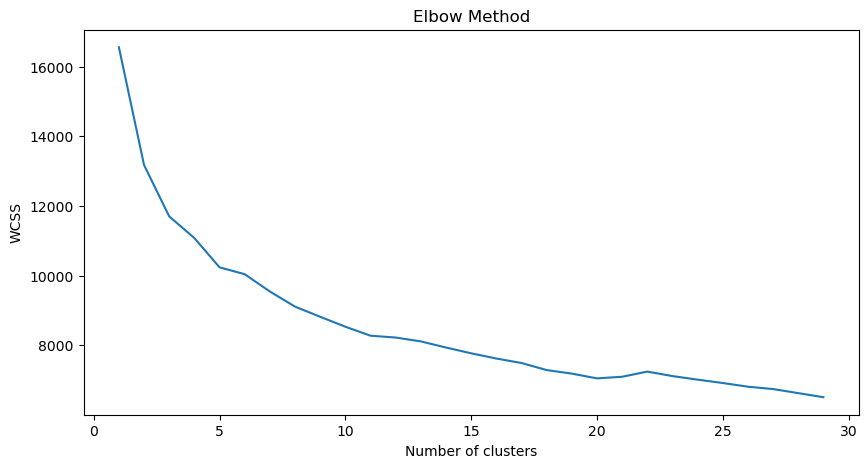

In [151]:
# show elbow plot
plt.figure(figsize=(10,5))
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [152]:
# cluster with k = 20
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(x_scaled)

# add cluster column to players_to_cluster
players_to_cluster['Cluster'] = kmeans.labels_
players_to_cluster

c:\Users\17782\miniconda3\envs\nba_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\17782\AppData\Local\Temp\ipykernel_21956\2005763548.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),...,Fta_y,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov,Cluster
0,2022,Ochai Agbaji,76.50,216.8,82.25,104.0,8.75,9.5,32.0,39.0,...,3.9,0.743,0.8,4.2,5.1,1.6,0.9,0.6,2.1,4
1,2022,Julian Champagnie,78.25,212.4,82.00,107.0,8.75,9.3,28.5,34.5,...,3.7,0.781,1.4,5.3,6.6,2.0,2.0,1.1,1.5,13
2,2022,Kofi Cockburn,83.00,293.0,88.25,110.5,9.75,10.3,29.5,32.5,...,7.3,0.655,3.4,7.2,10.6,0.8,0.8,1.0,2.3,8
3,2022,Keon Ellis,75.50,167.4,80.50,102.0,8.0,9.3,28.0,35.5,...,3.1,0.881,1.9,4.2,6.1,1.8,1.9,0.6,1.6,14
4,2022,Christian Koloko,82.75,221.0,89.25,113.0,9.0,10.8,28.0,33.5,...,3.7,0.735,2.6,4.7,7.3,1.4,0.8,2.8,1.6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2014,Jahii Carson,69.75,180.0,74.00,93.0,7.5,8.75,33.5,43.5,...,6.6,0.719,0.7,3.3,4.0,4.6,0.7,0.1,3.5,19
242,2016,Justin Jackson,79.00,193.0,82.75,103.5,8.75,8.75,29.5,34.5,...,2.4,0.667,1.8,2.1,3.9,2.8,0.6,0.4,1.1,5
243,2016,Jaron Blossomgame,78.25,214.0,82.00,102.0,8.5,10.0,35.0,41.0,...,5.5,0.782,1.8,4.9,6.7,1.5,0.7,1.3,1.8,18
244,2016,Dedric Lawson,79.00,225.0,86.50,106.5,9.5,9.5,22.5,28.0,...,5.5,0.709,3.2,6.2,9.3,2.5,1.2,1.7,3.2,1


In [153]:
players_to_cluster.columns

Index(['Year', 'Player', 'Height (No Shoes)', 'Weight', 'Wingspan',
       'Standing reach', 'Hand (Length)', 'Hand (Width)', 'Vertical (No Step)',
       'Vertical (Max)', 'Agility', 'Sprint', 'Ortg', 'Usg', 'Efg', 'Ts_per',
       'Orb_per', 'Drb_per', 'Ast_per', 'To_per', 'Ftm_x', 'Fta_x', 'Ft_per',
       'Twopm', 'Twopa', 'Twop_per', 'Tpm', 'Tpa', 'Tp_per', 'Blk_per',
       'Stl_per', 'Ftr', 'Porpag', 'Adjoe', 'Pfr', 'Pid', 'Ast/tov', 'Rimmade',
       'Rimmade+rimmiss', 'Midmade', 'Midmade+midmiss',
       'Rimmade/(rimmade+rimmiss)', 'Midmade/(midmade+midmiss)', 'Dunksmade',
       'Dunksmiss+dunksmade', 'Dunksmade/(dunksmade+dunksmiss)', 'Drtg',
       'Adrtg', 'Dporpag', 'Stops', 'Bpm', 'Obpm', 'Dbpm', 'Gbpm', 'Ogbpm',
       'Dgbpm', 'Oreb', 'Dreb', 'Treb', 'Ast', 'Stl', 'Blk', 'Pts', 'Ppg',
       'Fgm', 'Fga', 'Fg%', '3pm', '3pa', '3p%', 'Ftm_y', 'Fta_y', 'Ft%',
       'Orb', 'Drb', 'Rpg', 'Apg', 'Spg', 'Bpg', 'Tov', 'Cluster'],
      dtype='object')

In [154]:
# order by most ppg
players_to_cluster = players_to_cluster.sort_values(by='Ppg', ascending=False)
players_to_cluster

,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),...,Fta_y,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov,Cluster
238,2011,Jimmer Fredette,72.75,196.0,76.50,96.5,8.0,8.5,28.0,33.0,...,7.6,0.894,0.6,2.8,3.4,4.3,1.3,0.0,3.5,2
130,2014,Doug McDermott,78.25,218.0,81.25,103.0,8.75,9.8,28.5,36.5,...,5.9,0.864,1.6,5.3,7.0,1.6,0.2,0.1,1.8,18
135,2014,T.J. Warren,79.00,220.2,82.25,104.0,8.75,9.0,27.0,35.5,...,6.5,0.690,3.2,3.9,7.1,1.1,1.8,0.6,2.4,18
177,2012,Damian Lillard,73.75,188.8,79.75,95.5,8.75,9.8,34.5,39.5,...,8.0,0.887,0.5,4.5,5.0,4.0,1.5,0.2,2.3,2
54,2019,Carsen Edwards,70.75,199.4,78.00,94.5,8.75,9.0,28.5,34.0,...,6.1,0.837,0.4,3.2,3.6,2.9,1.3,0.3,3.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2015,J.P. Tokoto,77.25,195.8,82.00,100.5,8.0,8.8,34.5,40.0,...,3.1,0.615,1.6,4.0,5.6,4.3,1.5,0.3,2.2,7
27,2021,Scottie Lewis,76.00,187.6,84.00,101.5,8.75,9.8,34.0,42.0,...,2.6,0.673,0.8,2.3,3.1,1.5,1.6,1.0,1.9,14
179,2012,Fab Melo,82.75,255.0,86.50,110.0,9.0,10.0,29.5,31.0,...,2.0,0.633,2.7,3.2,5.8,0.7,0.5,2.9,1.4,12
144,2013,Dewayne Dedmon,82.00,238.8,88.00,109.0,9.0,11.0,28.0,32.5,...,1.5,0.681,2.3,4.7,7.0,0.6,1.1,2.1,1.6,12


In [157]:
# show all players in cluster 3, oclumns year player and pick
players_to_cluster[players_to_cluster['Cluster'] == 7]

,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),...,Fta_y,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov,Cluster
52,2019,Terence Davis,75.00,192.4,80.75,101.0,9.25,10.8,29.5,34.0,...,3.1,0.772,1.1,4.7,5.8,3.5,1.6,0.6,2.8,7
44,2020,Tyrell Terry,73.50,170.0,73.75,96.0,7.5,8.3,30.0,34.0,...,3.5,0.891,0.4,4.1,4.5,3.2,1.4,0.1,2.6,7
204,2011,Demetri McCamey,73.75,204.0,78.25,99.5,8.5,9.0,27.0,33.0,...,3.7,0.724,0.5,2.9,3.4,6.1,1.0,0.2,2.9,7
93,2016,Isaiah Cousins,75.25,194.0,78.25,98.5,8.25,8.8,30.5,37.0,...,2.6,0.670,0.6,3.8,4.5,4.5,1.4,0.3,2.4,7
29,2021,Jaden Springer,75.00,202.0,79.75,99.0,8.5,9.8,34.5,41.5,...,4.0,0.810,1.0,2.5,3.5,2.9,1.2,0.4,2.4,7
141,2013,Michael Carter-Williams,76.75,184.4,79.25,101.0,7.5,8.5,31.5,41.0,...,4.7,0.694,1.3,3.6,4.9,7.3,2.8,0.5,3.4,7
9,2022,Andrew Nembhard,75.00,195.6,77.75,99.0,8.0,9.5,26.5,35.0,...,1.7,0.873,0.4,2.9,3.4,5.8,1.6,0.1,1.9,7
73,2018,Trevon Duval,73.50,191.0,80.25,97.5,8.75,10.0,34.0,41.5,...,2.4,0.596,0.5,1.4,2.0,5.6,1.5,0.1,2.8,7
156,2013,Peyton Siva,71.50,180.6,75.00,93.0,8.0,9.8,33.5,41.5,...,2.5,0.867,0.3,2.1,2.4,5.7,2.3,0.2,2.7,7
119,2015,J.P. Tokoto,77.25,195.8,82.00,100.5,8.0,8.8,34.5,40.0,...,3.1,0.615,1.6,4.0,5.6,4.3,1.5,0.3,2.2,7
